In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Salary.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

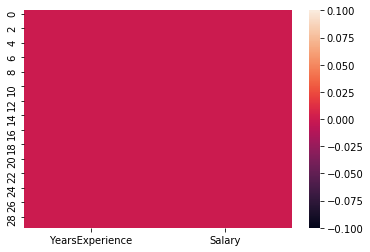

In [7]:
import seaborn as sns
sns.heatmap(df.isnull())    #checking null values by heatmap

In [11]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np

In [16]:
z=np.abs(zscore(df))
print(df.shape)
df1=df[(z<3).all(axis=1)]
print(df1.shape)


(30, 2)
(30, 2)


In [15]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

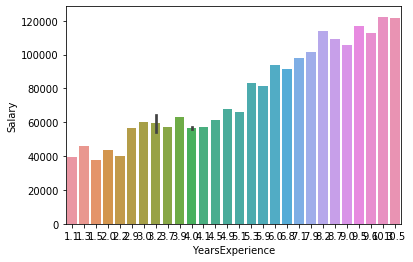

In [18]:
sns.barplot(x=df['YearsExperience'],y=df['Salary'])
plt.show()

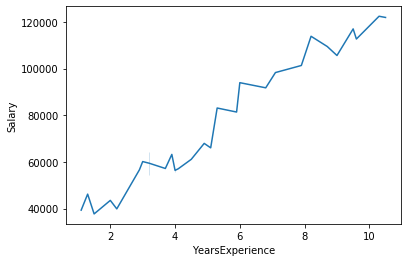

In [19]:
sns.lineplot(x=df['YearsExperience'],y=df['Salary'])
plt.show()

In [23]:
x=df[['YearsExperience']]
y=df[['Salary']]

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [31]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state, "is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_score=r_state
print()

print("max_r2_score corresponding to" ,final_r_score,"is",max_r_score)

   

r2_score corresponding to random state: 42 is:  0.9317736970098526
r2_score corresponding to random state: 43 is:  0.8692755521699916
r2_score corresponding to random state: 44 is:  0.9288586468309799
r2_score corresponding to random state: 45 is:  0.93770767161518
r2_score corresponding to random state: 46 is:  0.9757695499348715
r2_score corresponding to random state: 47 is:  0.9867477391228237
r2_score corresponding to random state: 48 is:  0.9719052507517759
r2_score corresponding to random state: 49 is:  0.9506251728086869
r2_score corresponding to random state: 50 is:  0.8933079582303989
r2_score corresponding to random state: 51 is:  0.9603243606926426
r2_score corresponding to random state: 52 is:  0.9645613974213919
r2_score corresponding to random state: 53 is:  0.9508125448486936
r2_score corresponding to random state: 54 is:  0.9521760506226666
r2_score corresponding to random state: 55 is:  0.8847851881685777
r2_score corresponding to random state: 56 is:  0.95652764115209

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x,y,cv=5,scoring="r2").mean()

-0.05336427684509617

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is", r2_score(y_test,y_pred))   # predict r2 score
print("RMSE is", np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is 0.9275881261342499
RMSE is 6348.24905615136


In [35]:
from sklearn.externals import joblib   # saving the model
joblib.dump(lr,'SalaryLR.obj')

['SalaryLR.obj']

In [37]:
lr_from_joblib=joblib.load('SalaryLR.obj')   #loading the model

In [38]:
lr_from_joblib.predict(x_test)

array([[102634.78697793],
       [107257.90769358],
       [ 73971.43854091],
       [ 63800.57296648],
       [ 92463.9214035 ],
       [115579.52498174],
       [ 62875.94882335]])

In [ ]:
# conclusion:  As yers of experiance increase salary also increase (directly proption relationship)
#               linear regression model works for this with accuracy of 98%. 